# Lab Instructions

Choose your own adventure! In this lab, you will select a dataset, identify the target feature, and determine what relationships are present between the target and the other features in the data.

The dataset should have at least 5 features plus the target and at least a few hundred rows.  If the original dataset has more than 5 features, you may select the 5 that seem most interesting for this project. The subject can be anything you choose.  

For your lab submission, describe the dataset and the features - including all of the values of the features - and identify the target feature.  Then make visualizations to show the relationship of each feature to the target.  Which feature(s) seem most related?  Which features don't seem to influence the value of the target?  Draw at least one big picture conclusion about your data from the visualizations you've created.


For this lab I am using the shopping_behavior_updated.csv from https://www.kaggle.com/datasets/ayeshaimran1619/customer-spending-patterns . This dataset contains information on consumer spending. Our target feature will be the Purchase Amount. Our other features will be Age, Gender, Category, Payment Method, and Season. Based on our analysis Age and Season are the most related features to consumer spending. The least related features are Payment Method and Gender. One big picture conclusion from these visualizations is that while our dataset can have rich correlations these may not be evident in single feature to target feature correlations. For example while age is our most related feature to spending amount, its true relation may not be visible until we visualize how its influence varies with other features. Sometimes a features full importance is not realized until we examine its relationship with other features.

Loading dataset...
Dataset shape: (3900, 18)

First 5 rows:
   Customer ID  Age Gender Item Purchased  Category  Purchase Amount (USD)  \
0            1   55   Male         Blouse  Clothing                     53   
1            2   19   Male        Sweater  Clothing                     64   
2            3   50   Male          Jeans  Clothing                     73   
3            4   21   Male        Sandals  Footwear                     90   
4            5   45   Male         Blouse  Clothing                     49   

        Location Size      Color  Season  Review Rating Subscription Status  \
0       Kentucky    L       Gray  Winter            3.1                 Yes   
1          Maine    L     Maroon  Winter            3.1                 Yes   
2  Massachusetts    S     Maroon  Spring            3.1                 Yes   
3   Rhode Island    M     Maroon  Spring            3.5                 Yes   
4         Oregon    M  Turquoise  Spring            2.7                 Yes 

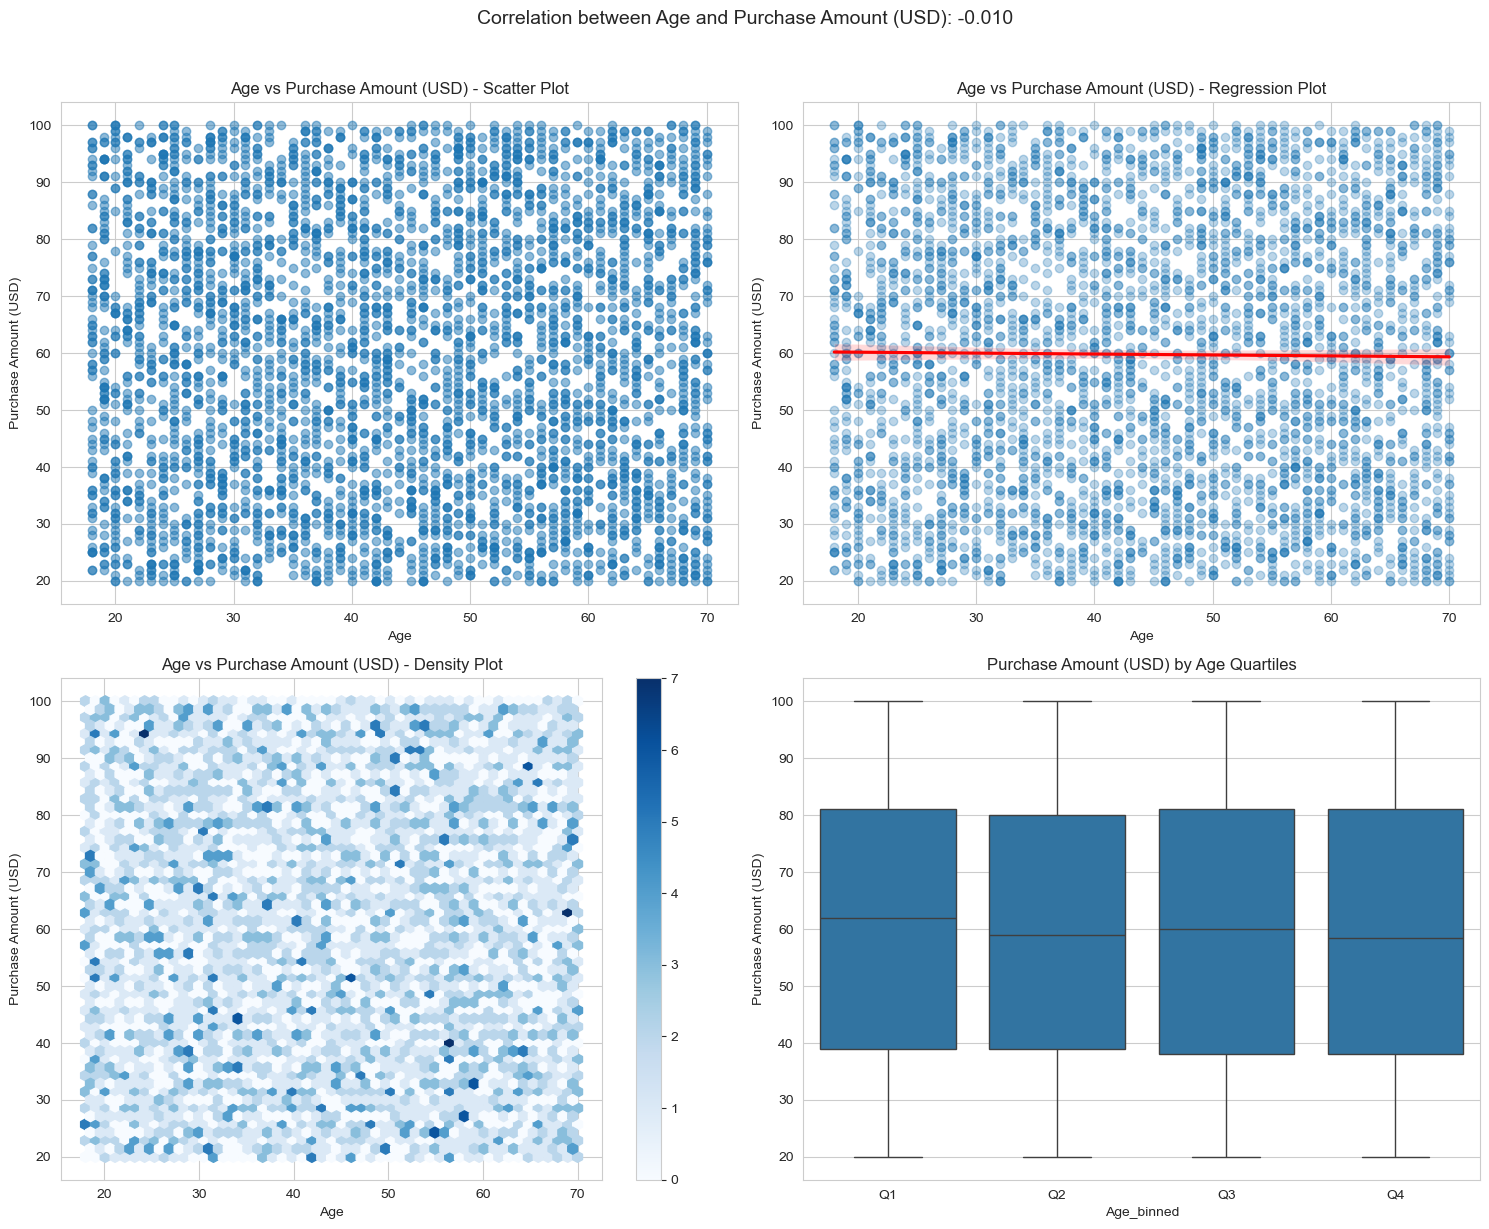

Correlation coefficient: -0.010
→ Very weak or no linear relationship with target

Analyzing: Gender


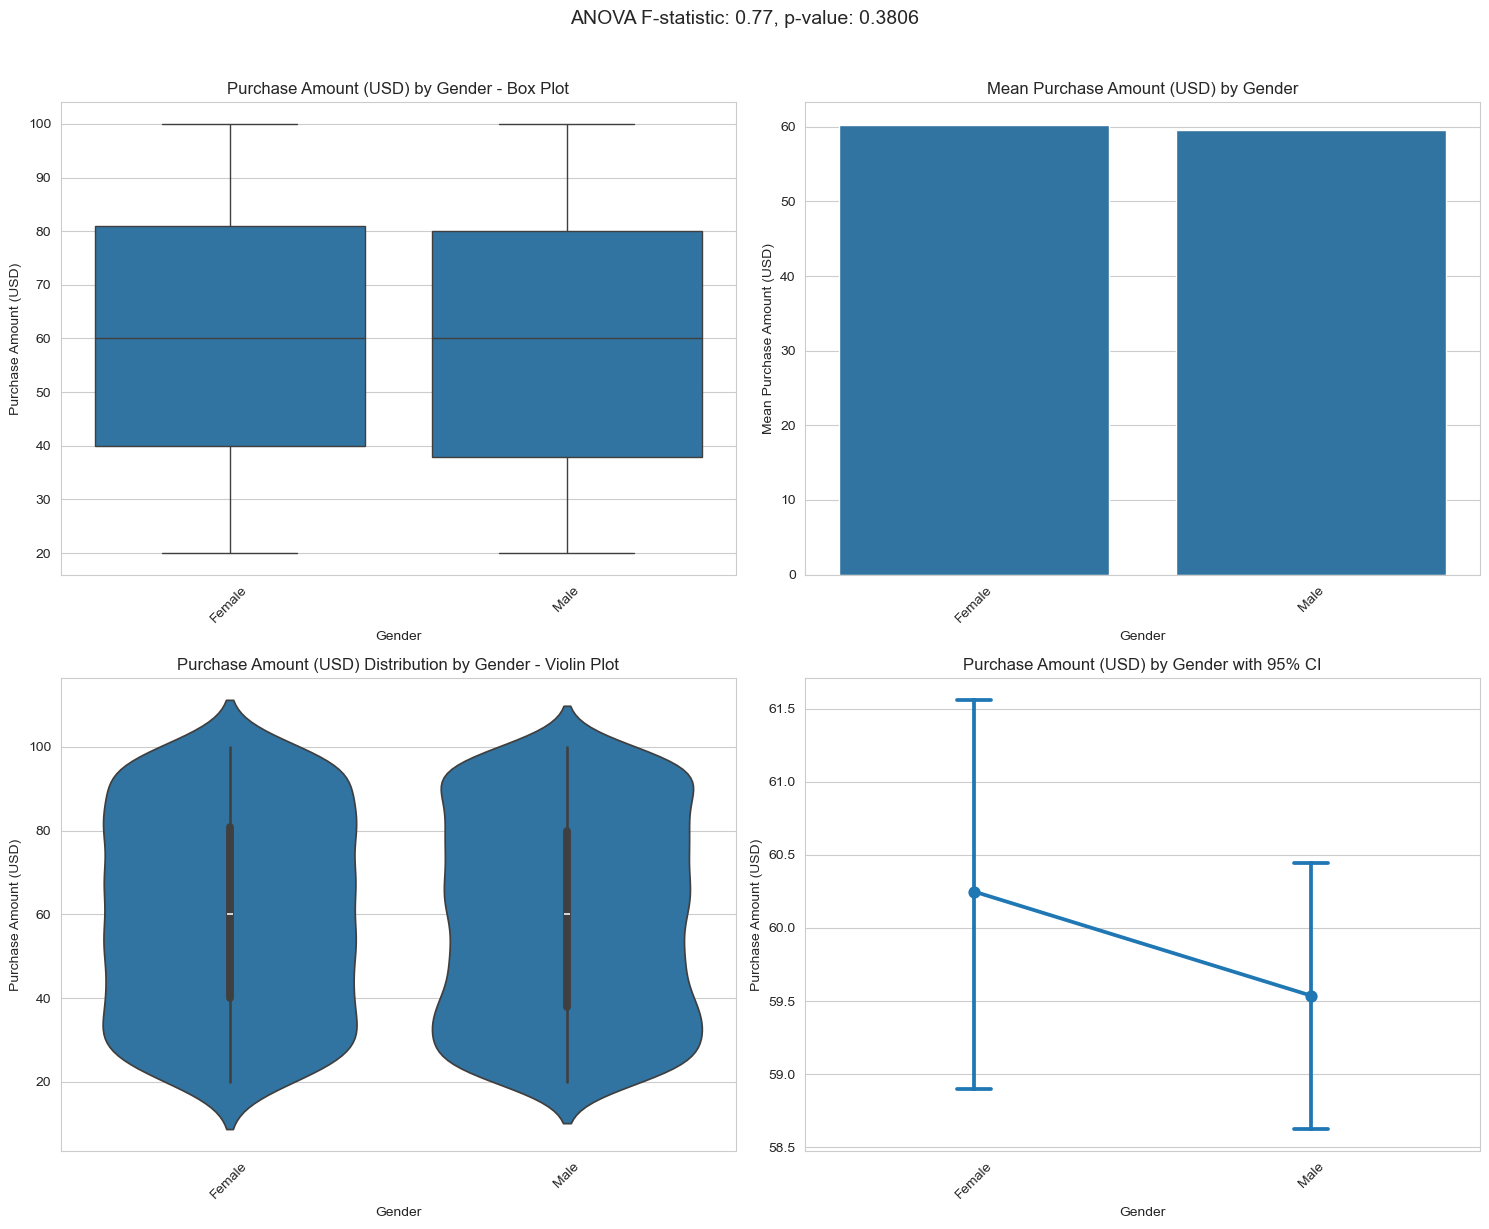

ANOVA F-statistic: 0.77, p-value: 0.3806
→ No statistically significant relationship with target

Analyzing: Category


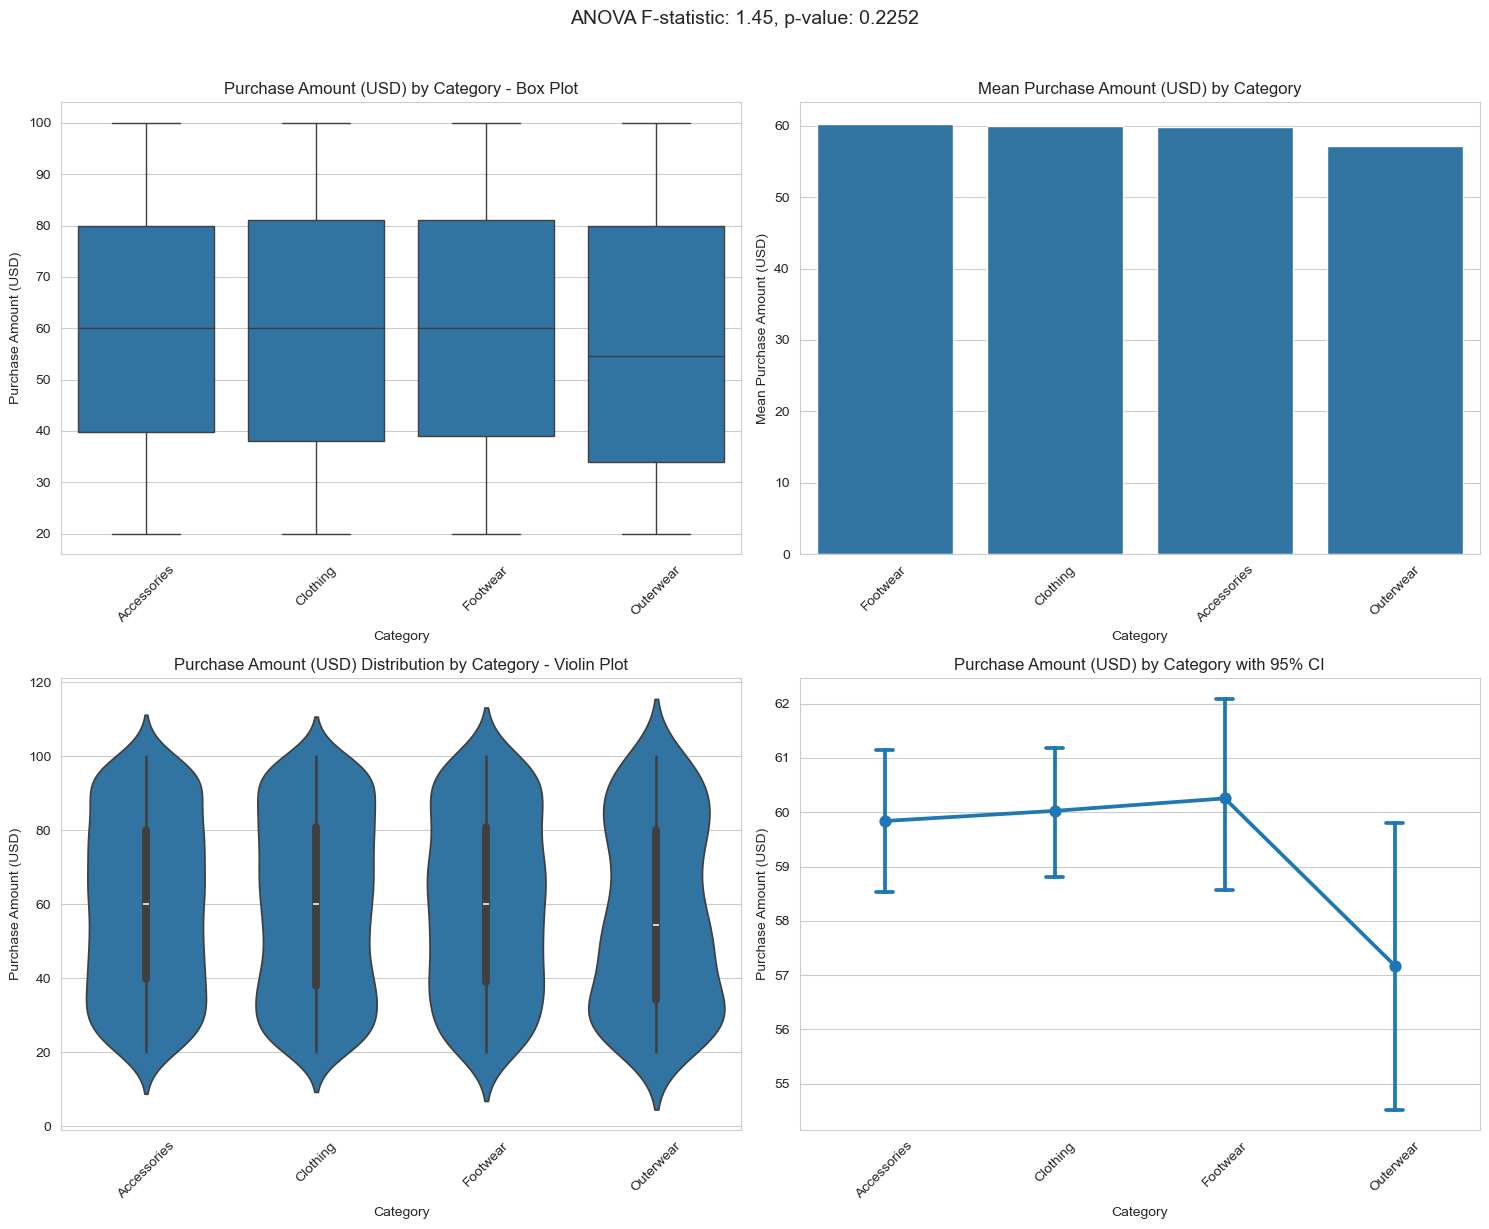

ANOVA F-statistic: 1.45, p-value: 0.2252
→ No statistically significant relationship with target

Analyzing: Payment Method


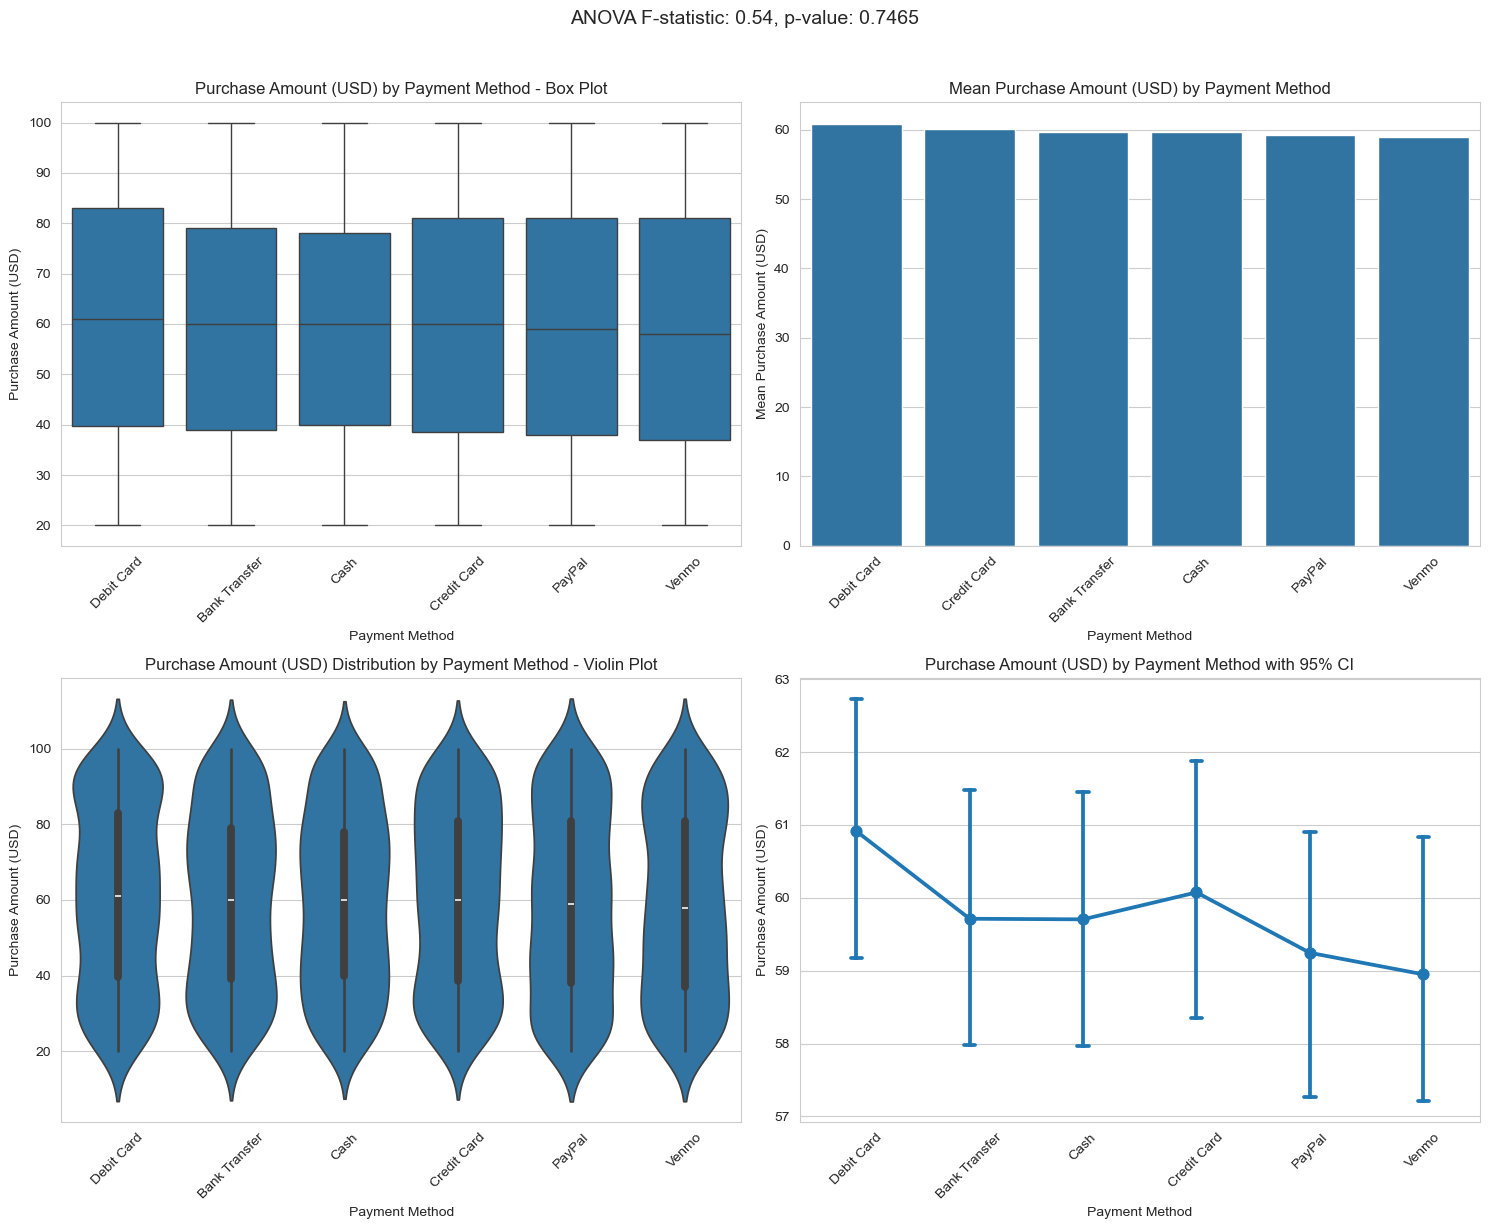

ANOVA F-statistic: 0.54, p-value: 0.7465
→ No statistically significant relationship with target

Analyzing: Season


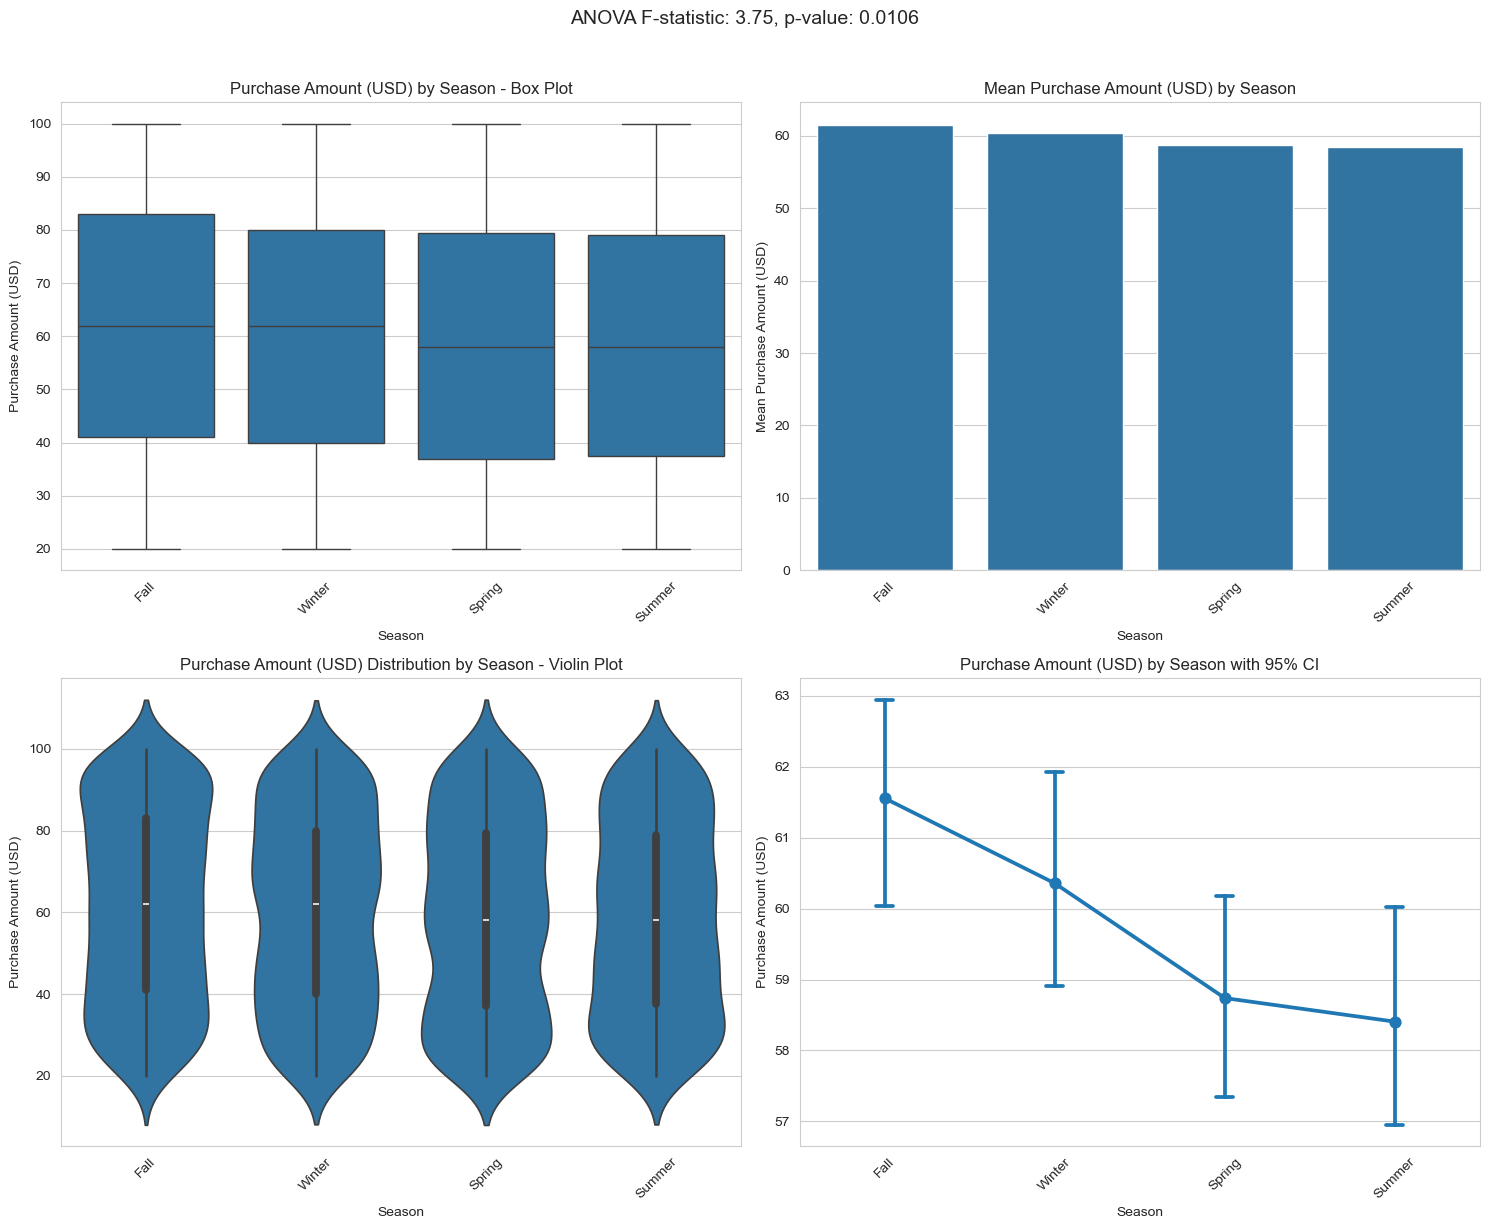

ANOVA F-statistic: 3.75, p-value: 0.0106
→ Statistically significant relationship with target (p < 0.05)

CORRELATION ANALYSIS
Columns for correlation analysis: ['Age', 'Gender', 'Category', 'Payment Method', 'Season', 'Purchase Amount (USD)']


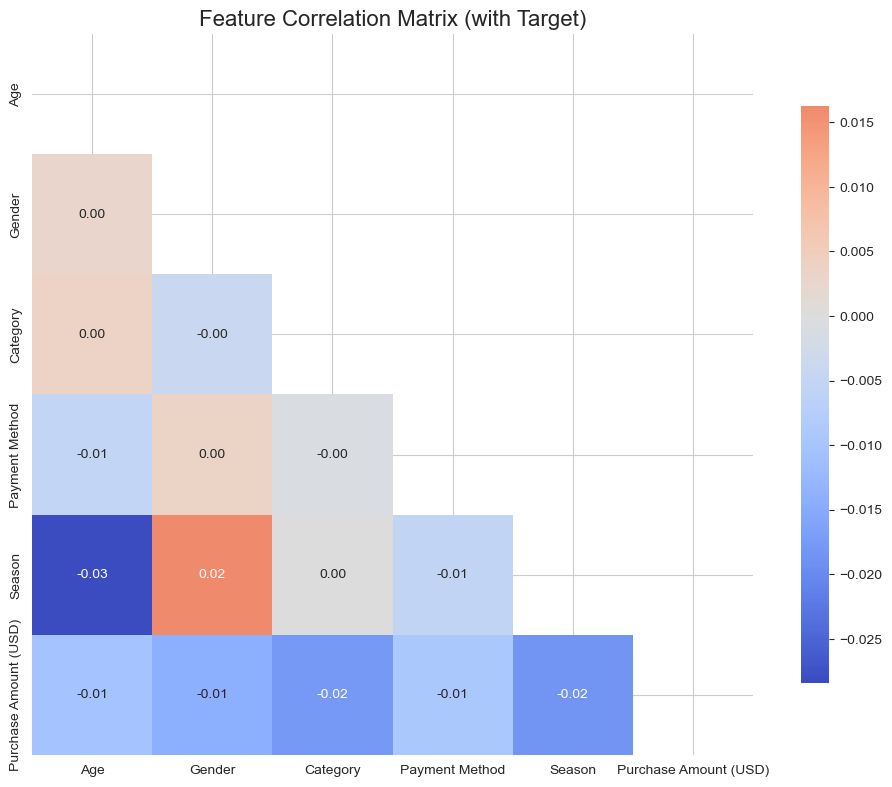


Correlation with target (Purchase Amount):
Payment Method: -0.009
Age: -0.010
Gender: -0.014
Category: -0.018
Season: -0.018

FEATURE IMPORTANCE ANALYSIS

Feature Ranking by Importance:
--------------------------------------------------
Age: Correlation = -0.010
Season: Eta² = 0.003 (F=3.7, p=0.0106)
Category: Eta² = 0.001 (F=1.5, p=0.2252)
Payment Method: Eta² = 0.001 (F=0.5, p=0.7465)
Gender: Eta² = 0.000 (F=0.8, p=0.3806)

INTERPRETATION:

MOST IMPORTANT FEATURES (strongest relationship with Purchase Amount):
- Age
- Season
- Category

LEAST IMPORTANT FEATURES (weakest relationship with Purchase Amount):
- Category
- Payment Method
- Gender

Results saved to 'feature_importance_results.csv'


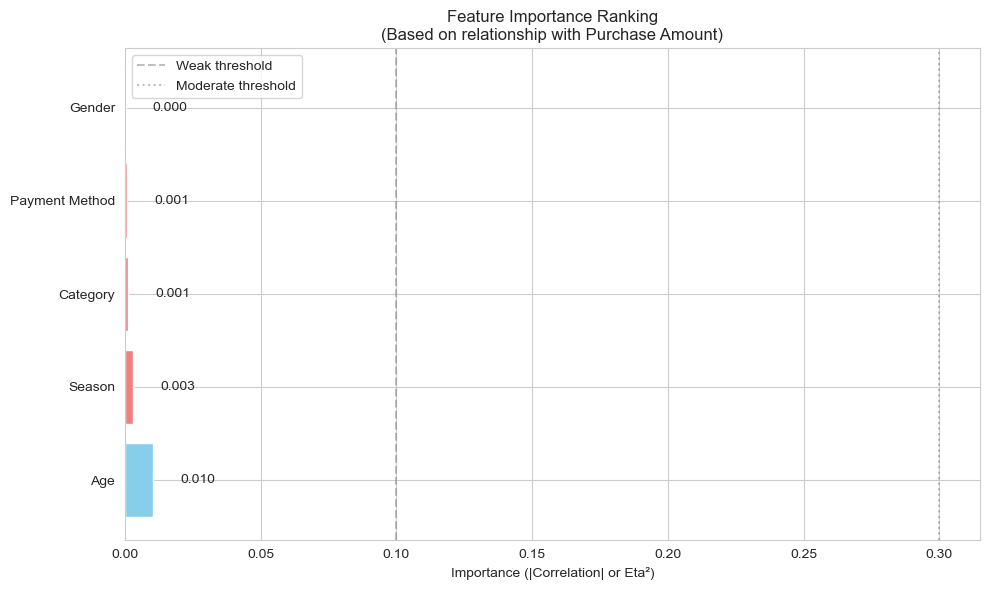


SUMMARY STATISTICS BY CATEGORY

Gender Summary:
         mean  median    std  count
Gender                             
Female  60.25    60.0  23.42   1248
Male    59.54    60.0  23.81   2652

Category Summary:
              mean  median    std  count
Category                                
Accessories  59.84    60.0  23.30   1240
Clothing     60.03    60.0  23.79   1737
Footwear     60.26    60.0  23.64    599
Outerwear    57.17    54.5  24.59    324

Payment Method Summary:
                 mean  median    std  count
Payment Method                             
Bank Transfer   59.71    60.0  23.38    612
Cash            59.70    60.0  23.02    670
Credit Card     60.07    60.0  23.41    671
Debit Card      60.92    61.0  23.95    636
PayPal          59.25    59.0  24.39    677
Venmo           58.95    58.0  23.97    634

Season Summary:
         mean  median    std  count
Season                             
Fall    61.56    62.0  23.75    975
Spring  58.74    58.0  23.94    999
Summ

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')

# Set visualization style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 8)

def load_and_explore_data(file_path):
    """
    Load the dataset and perform initial exploration
    """
    print("Loading dataset...")
    df = pd.read_csv(file_path)
    
    print(f"Dataset shape: {df.shape}")
    print("\nFirst 5 rows:")
    print(df.head())
    print("\nDataset info:")
    print(df.info())
    print("\nMissing values:")
    print(df.isnull().sum())
    print("\nBasic statistics:")
    print(df.describe(include='all'))
    
    return df

def visualize_numeric_feature(df, feature, target):
    """
    Visualize relationship between numeric feature and target
    """
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))
    
    # Scatter plot
    axes[0, 0].scatter(df[feature], df[target], alpha=0.5)
    axes[0, 0].set_xlabel(feature)
    axes[0, 0].set_ylabel(target)
    axes[0, 0].set_title(f'{feature} vs {target} - Scatter Plot')
    
    # Regression plot
    sns.regplot(x=feature, y=target, data=df, ax=axes[0, 1], 
                scatter_kws={'alpha':0.3}, line_kws={'color':'red'})
    axes[0, 1].set_title(f'{feature} vs {target} - Regression Plot')
    
    # Hexbin plot for density
    hb = axes[1, 0].hexbin(df[feature], df[target], gridsize=50, cmap='Blues')
    axes[1, 0].set_xlabel(feature)
    axes[1, 0].set_ylabel(target)
    axes[1, 0].set_title(f'{feature} vs {target} - Density Plot')
    plt.colorbar(hb, ax=axes[1, 0])
    
    # Box plot by quartiles
    df[f'{feature}_binned'] = pd.qcut(df[feature], q=4, labels=['Q1', 'Q2', 'Q3', 'Q4'])
    sns.boxplot(x=f'{feature}_binned', y=target, data=df, ax=axes[1, 1])
    axes[1, 1].set_title(f'{target} by {feature} Quartiles')
    
    # Calculate correlation
    corr = df[[feature, target]].corr().iloc[0, 1]
    fig.suptitle(f'Correlation between {feature} and {target}: {corr:.3f}', 
                 fontsize=14, y=1.02)
    
    plt.tight_layout()
    plt.show()
    
    # Remove temporary column
    df.drop(f'{feature}_binned', axis=1, inplace=True)
    
    return corr

def visualize_categorical_feature(df, feature, target):
    """
    Visualize relationship between categorical feature and target
    """
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))
    
    # Box plot
    order = df.groupby(feature)[target].median().sort_values(ascending=False).index
    sns.boxplot(x=feature, y=target, data=df, ax=axes[0, 0], order=order)
    axes[0, 0].tick_params(axis='x', rotation=45)
    axes[0, 0].set_title(f'{target} by {feature} - Box Plot')
    
    # Bar plot (mean values)
    mean_values = df.groupby(feature)[target].mean().sort_values(ascending=False)
    sns.barplot(x=mean_values.index, y=mean_values.values, ax=axes[0, 1])
    axes[0, 1].tick_params(axis='x', rotation=45)
    axes[0, 1].set_xlabel(feature)
    axes[0, 1].set_ylabel(f'Mean {target}')
    axes[0, 1].set_title(f'Mean {target} by {feature}')
    
    # Violin plot
    sns.violinplot(x=feature, y=target, data=df, ax=axes[1, 0], order=order)
    axes[1, 0].tick_params(axis='x', rotation=45)
    axes[1, 0].set_title(f'{target} Distribution by {feature} - Violin Plot')
    
    # Point plot with confidence intervals
    sns.pointplot(x=feature, y=target, data=df, ax=axes[1, 1], order=order, 
                  ci=95, capsize=0.1)
    axes[1, 1].tick_params(axis='x', rotation=45)
    axes[1, 1].set_title(f'{target} by {feature} with 95% CI')
    
    # Calculate ANOVA F-statistic
    groups = [df[df[feature] == cat][target] for cat in df[feature].unique()]
    f_stat, p_value = stats.f_oneway(*groups)
    
    fig.suptitle(f'ANOVA F-statistic: {f_stat:.2f}, p-value: {p_value:.4f}', 
                 fontsize=14, y=1.02)
    
    plt.tight_layout()
    plt.show()
    
    return f_stat, p_value

def correlation_heatmap(df, features, target):
    """
    Create correlation heatmap for specified features only
    """
    # Create a subset with only the features we want to analyze
    columns_to_analyze = features + [target]
    
    # Check which columns actually exist in the dataframe
    available_columns = [col for col in columns_to_analyze if col in df.columns]
    print(f"Columns for correlation analysis: {available_columns}")
    
    if len(available_columns) < 2:
        print("Not enough columns for correlation analysis.")
        return
    
    df_subset = df[available_columns].copy()
    
    # Create encoded version for correlation matrix
    df_encoded = df_subset.copy()
    
    # Encode categorical variables
    le = LabelEncoder()
    for col in features:
        if col in df_encoded.columns and df_encoded[col].dtype == 'object':
            try:
                df_encoded[col] = le.fit_transform(df_encoded[col].astype(str))
            except Exception as e:
                print(f"Could not encode {col}: {e}")
                df_encoded.drop(col, axis=1, inplace=True)
    
    # Calculate correlation matrix
    try:
        corr_matrix = df_encoded.corr()
        
        plt.figure(figsize=(10, 8))
        mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
        sns.heatmap(corr_matrix, mask=mask, annot=True, fmt='.2f', 
                    cmap='coolwarm', center=0, square=True, 
                    cbar_kws={"shrink": 0.8})
        plt.title('Feature Correlation Matrix (with Target)', fontsize=16)
        plt.tight_layout()
        plt.show()
        
        # Print correlations with target
        print("\nCorrelation with target (Purchase Amount):")
        target_correlations = corr_matrix[target].sort_values(ascending=False)
        for feature, corr in target_correlations.items():
            if feature != target:
                print(f"{feature}: {corr:.3f}")
                
    except Exception as e:
        print(f"Error calculating correlation matrix: {e}")
        print("\nShowing pairplot instead...")
        try:
            sns.pairplot(df_subset, diag_kind='kde')
            plt.tight_layout()
            plt.show()
        except:
            print("Could not create pairplot either.")

def analyze_feature_importance(df, features, target):
    """
    Summarize feature importance based on statistical analysis
    """
    print("\n" + "="*60)
    print("FEATURE IMPORTANCE ANALYSIS")
    print("="*60)
    
    results = []
    
    for feature in features:
        if feature not in df.columns:
            print(f"Warning: {feature} not found in dataset. Skipping...")
            continue
            
        if df[feature].dtype in ['int64', 'float64']:
            # Numeric feature
            corr = df[[feature, target]].corr().iloc[0, 1]
            results.append({
                'Feature': feature,
                'Type': 'Numeric',
                'Correlation': corr,
                'Abs_Correlation': abs(corr)
            })
        else:
            # Categorical feature
            # Calculate eta squared (effect size for ANOVA)
            try:
                groups = [df[df[feature] == cat][target] 
                         for cat in df[feature].unique()]
                f_stat, p_value = stats.f_oneway(*groups)
                
                # Calculate eta squared
                n_groups = len(groups)
                total_n = sum(len(g) for g in groups)
                if n_groups > 1:
                    eta_squared = f_stat / (f_stat + (total_n - n_groups)/(n_groups - 1))
                else:
                    eta_squared = 0
                
                results.append({
                    'Feature': feature,
                    'Type': 'Categorical',
                    'F_Statistic': f_stat,
                    'P_Value': p_value,
                    'Eta_Squared': eta_squared,
                    'Abs_Correlation': eta_squared  # Using eta squared as importance metric
                })
            except Exception as e:
                print(f"Error analyzing {feature}: {e}")
                results.append({
                    'Feature': feature,
                    'Type': 'Categorical',
                    'F_Statistic': np.nan,
                    'P_Value': np.nan,
                    'Eta_Squared': 0,
                    'Abs_Correlation': 0
                })
    
    if not results:
        print("No features could be analyzed.")
        return pd.DataFrame()
    
    # Create results dataframe
    results_df = pd.DataFrame(results)
    
    # Sort by absolute correlation/effect size
    results_df = results_df.sort_values('Abs_Correlation', ascending=False)
    
    print("\nFeature Ranking by Importance:")
    print("-"*50)
    for i, row in results_df.iterrows():
        if row['Type'] == 'Numeric':
            print(f"{row['Feature']}: Correlation = {row['Correlation']:.3f}")
        else:
            if pd.isna(row['F_Statistic']):
                print(f"{row['Feature']}: Could not analyze")
            else:
                print(f"{row['Feature']}: Eta² = {row['Eta_Squared']:.3f} "
                      f"(F={row['F_Statistic']:.1f}, p={row['P_Value']:.4f})")
    
    print("\n" + "="*60)
    print("INTERPRETATION:")
    print("="*60)
    
    # Determine most and least important features
    if len(results_df) >= 3:
        top_3 = results_df.head(3)
        bottom_3 = results_df.tail(3)
        
        print("\nMOST IMPORTANT FEATURES (strongest relationship with Purchase Amount):")
        for _, row in top_3.iterrows():
            print(f"- {row['Feature']}")
        
        print("\nLEAST IMPORTANT FEATURES (weakest relationship with Purchase Amount):")
        for _, row in bottom_3.iterrows():
            print(f"- {row['Feature']}")
    else:
        print(f"\nOnly {len(results_df)} features analyzed.")
        for _, row in results_df.iterrows():
            importance = "Important" if row['Abs_Correlation'] > 0.1 else "Less Important"
            print(f"- {row['Feature']}: {importance}")
    
    return results_df

def verify_columns_exist(df, required_columns):
    """
    Check if all required columns exist in the dataframe
    """
    missing_columns = []
    available_columns = []
    
    for col in required_columns:
        if col in df.columns:
            available_columns.append(col)
        else:
            missing_columns.append(col)
    
    if missing_columns:
        print(f"\nWARNING: The following columns are missing from the dataset:")
        for col in missing_columns:
            print(f"  - {col}")
        
        # Try to find close matches
        print("\nLooking for close matches...")
        all_columns = df.columns.tolist()
        for missing in missing_columns:
            # Look for partial matches
            matches = [col for col in all_columns if missing.lower() in col.lower()]
            if matches:
                print(f"  For '{missing}', did you mean: {matches}")
    
    return available_columns

def main():
    """
    Main function to execute the analysis
    """
    # Load your dataset
    file_path = 'shopping_behavior_updated.csv'
    df = load_and_explore_data(file_path)
    
    # HARDCODED FEATURES AND TARGET (MANUALLY SET THESE)
    # ===================================================
    # These are the exact features you specified:
    FEATURES = ['Age', 'Gender', 'Category', 'Payment Method', 'Season']
    TARGET = 'Purchase Amount (USD)'
    # ===================================================
    
    print("\n" + "="*60)
    print("HARDCODED FEATURE CONFIGURATION")
    print("="*60)
    print(f"Target feature: {TARGET}")
    print(f"Features to analyze: {FEATURES}")
    
    # Verify columns exist
    print("\nVerifying columns exist in dataset...")
    all_columns = [TARGET] + FEATURES
    available_columns = verify_columns_exist(df, all_columns)
    
    # Check if target is available
    if TARGET not in available_columns:
        print(f"\nERROR: Target column '{TARGET}' not found in dataset!")
        print(f"Available columns: {df.columns.tolist()}")
        return
    
    # Filter to only keep the columns we're analyzing
    columns_to_keep = [col for col in all_columns if col in df.columns]
    print(f"\nKeeping only these columns for analysis: {columns_to_keep}")
    
    # Create a new dataframe with only our features
    df_analysis = df[columns_to_keep].copy()
    
    # Check for missing values
    print("\nMissing values in analysis columns:")
    missing = df_analysis.isnull().sum()
    print(missing[missing > 0])
    
    if missing.sum() > 0:
        print("\nWarning: There are missing values. Consider handling them before analysis.")
        # Optionally, you can fill or drop missing values here
        # For simplicity, we'll drop rows with missing values
        initial_rows = len(df_analysis)
        df_analysis = df_analysis.dropna()
        final_rows = len(df_analysis)
        print(f"Dropped {initial_rows - final_rows} rows with missing values.")
    
    # Create visualizations for each feature
    for feature in FEATURES:
        if feature not in df_analysis.columns:
            print(f"\nSkipping {feature} - not in dataset")
            continue
            
        print(f"\n{'='*60}")
        print(f"Analyzing: {feature}")
        print('='*60)
        
        if df_analysis[feature].dtype in ['int64', 'float64']:
            # Numeric feature analysis
            corr = visualize_numeric_feature(df_analysis, feature, TARGET)
            print(f"Correlation coefficient: {corr:.3f}")
            
            if abs(corr) > 0.3:
                print("→ Moderate to strong relationship with target")
            elif abs(corr) > 0.1:
                print("→ Weak relationship with target")
            else:
                print("→ Very weak or no linear relationship with target")
                
        else:
            # Categorical feature analysis
            f_stat, p_value = visualize_categorical_feature(df_analysis, feature, TARGET)
            print(f"ANOVA F-statistic: {f_stat:.2f}, p-value: {p_value:.4f}")
            
            if p_value < 0.05:
                print("→ Statistically significant relationship with target (p < 0.05)")
            else:
                print("→ No statistically significant relationship with target")
    
    # Correlation heatmap
    print("\n" + "="*60)
    print("CORRELATION ANALYSIS")
    print("="*60)
    correlation_heatmap(df_analysis, FEATURES, TARGET)
    
    # Feature importance analysis
    results_df = analyze_feature_importance(df_analysis, FEATURES, TARGET)
    
    if not results_df.empty:
        # Save results
        results_df.to_csv('feature_importance_results.csv', index=False)
        print("\nResults saved to 'feature_importance_results.csv'")
        
        # Summary visualization
        plt.figure(figsize=(10, 6))
        
        # Prepare data for summary plot
        summary_data = []
        for _, row in results_df.iterrows():
            if row['Type'] == 'Numeric':
                summary_data.append({'Feature': row['Feature'], 
                                    'Importance': abs(row['Correlation']),
                                    'Type': 'Numeric'})
            else:
                summary_data.append({'Feature': row['Feature'],
                                    'Importance': row['Eta_Squared'],
                                    'Type': 'Categorical'})
        
        summary_df = pd.DataFrame(summary_data)
        
        # Create bar plot
        colors = ['skyblue' if t == 'Numeric' else 'lightcoral' 
                  for t in summary_df['Type']]
        bars = plt.barh(summary_df['Feature'], summary_df['Importance'], color=colors)
        plt.xlabel('Importance (|Correlation| or Eta²)')
        plt.title('Feature Importance Ranking\n(Based on relationship with Purchase Amount)')
        
        # Add threshold lines
        plt.axvline(x=0.1, color='gray', linestyle='--', alpha=0.5, label='Weak threshold')
        plt.axvline(x=0.3, color='gray', linestyle=':', alpha=0.5, label='Moderate threshold')
        
        # Add value labels on bars
        for bar in bars:
            width = bar.get_width()
            plt.text(width + 0.01, bar.get_y() + bar.get_height()/2, 
                    f'{width:.3f}', ha='left', va='center')
        
        plt.legend()
        plt.tight_layout()
        plt.show()
    
    # Additional analysis: Summary statistics by category
    print("\n" + "="*60)
    print("SUMMARY STATISTICS BY CATEGORY")
    print("="*60)
    
    for feature in FEATURES:
        if feature != 'Age' and feature in df_analysis.columns:
            if df_analysis[feature].dtype == 'object':
                print(f"\n{feature} Summary:")
                stats_by_feature = df_analysis.groupby(feature)[TARGET].agg(['mean', 'median', 'std', 'count'])
                print(stats_by_feature.round(2))
    
    print("\n" + "="*60)
    print("ANALYSIS COMPLETE")
    print("="*60)

if __name__ == "__main__":
    main()